# Personality Test Using K-Means

Tutorial : [Karolina Sowinska](https://www.youtube.com/watch?v=-OH-IiYtjTA&ab_channel=KarolinaSowinska)

Dataset  : [Big Five Personality Test](https://www.kaggle.com/tunguz/big-five-personality-test)

## Import modules

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data-final.csv', delimiter='\t')

In [3]:
df

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015336,4.0,2.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,...,2018-11-08 12:04:58,1920.0,1080.0,3.0,160.0,10,2,US,39.9883,-75.2208
1015337,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,...,2018-11-08 12:07:18,1920.0,1080.0,3.0,122.0,7,1,US,38.0,-97.0
1015338,4.0,2.0,4.0,3.0,5.0,1.0,4.0,2.0,4.0,4.0,...,2018-11-08 12:07:49,1920.0,1080.0,2.0,135.0,12,6,US,36.1473,-86.777
1015339,2.0,4.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,4.0,...,2018-11-08 12:08:34,1920.0,1080.0,6.0,212.0,8,1,US,34.1067,-117.8067


In [4]:
columns = df.columns

In [5]:
[str(idx+1) + '. ' + i for idx, i in enumerate(columns)]

['1. EXT1',
 '2. EXT2',
 '3. EXT3',
 '4. EXT4',
 '5. EXT5',
 '6. EXT6',
 '7. EXT7',
 '8. EXT8',
 '9. EXT9',
 '10. EXT10',
 '11. EST1',
 '12. EST2',
 '13. EST3',
 '14. EST4',
 '15. EST5',
 '16. EST6',
 '17. EST7',
 '18. EST8',
 '19. EST9',
 '20. EST10',
 '21. AGR1',
 '22. AGR2',
 '23. AGR3',
 '24. AGR4',
 '25. AGR5',
 '26. AGR6',
 '27. AGR7',
 '28. AGR8',
 '29. AGR9',
 '30. AGR10',
 '31. CSN1',
 '32. CSN2',
 '33. CSN3',
 '34. CSN4',
 '35. CSN5',
 '36. CSN6',
 '37. CSN7',
 '38. CSN8',
 '39. CSN9',
 '40. CSN10',
 '41. OPN1',
 '42. OPN2',
 '43. OPN3',
 '44. OPN4',
 '45. OPN5',
 '46. OPN6',
 '47. OPN7',
 '48. OPN8',
 '49. OPN9',
 '50. OPN10',
 '51. EXT1_E',
 '52. EXT2_E',
 '53. EXT3_E',
 '54. EXT4_E',
 '55. EXT5_E',
 '56. EXT6_E',
 '57. EXT7_E',
 '58. EXT8_E',
 '59. EXT9_E',
 '60. EXT10_E',
 '61. EST1_E',
 '62. EST2_E',
 '63. EST3_E',
 '64. EST4_E',
 '65. EST5_E',
 '66. EST6_E',
 '67. EST7_E',
 '68. EST8_E',
 '69. EST9_E',
 '70. EST10_E',
 '71. AGR1_E',
 '72. AGR2_E',
 '73. AGR3_E',
 '74. A

Dari kolom tersebut hanya 50 yang diperlukan 

In [6]:
X = df[df.columns[0:50]]

In [7]:
pd.set_option('display.max_columns', None)

In [8]:
X

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015336,4.0,2.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,4.0,3.0,4.0,3.0,3.0,3.0,5.0,4.0,2.0,5.0,2.0,4.0,2.0,4.0,4.0,4.0,2.0,3.0,3.0,3.0,4.0,4.0,4.0,2.0,3.0,3.0,2.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,2.0,4.0
1015337,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,4.0,3.0,5.0,1.0,5.0,5.0,4.0,4.0,4.0,5.0,2.0,4.0,1.0,4.0,3.0,5.0,3.0,3.0,5.0,3.0,3.0,2.0,3.0,4.0,3.0,3.0,2.0,3.0,2.0,3.0,4.0,1.0,5.0,1.0,5.0,1.0,3.0,4.0,5.0,4.0
1015338,4.0,2.0,4.0,3.0,5.0,1.0,4.0,2.0,4.0,4.0,3.0,2.0,4.0,3.0,2.0,2.0,4.0,2.0,4.0,1.0,3.0,5.0,5.0,3.0,2.0,3.0,2.0,4.0,3.0,5.0,4.0,5.0,3.0,5.0,1.0,5.0,1.0,4.0,1.0,4.0,5.0,1.0,5.0,1.0,4.0,1.0,5.0,5.0,4.0,5.0
1015339,2.0,4.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,4.0,4.0,3.0,4.0,2.0,4.0,4.0,2.0,2.0,4.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,3.0,4.0,2.0,4.0,2.0,2.0,2.0,4.0,2.0,4.0,4.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,5.0,5.0,3.0


In [9]:
X = X.fillna(0) # mengubah semua nilai nan jadi 0

In [10]:
from sklearn.cluster import MiniBatchKMeans 

In [11]:
kmeans = MiniBatchKMeans(n_clusters=10,     # Jumlah kluster
                         random_state=0,    
                         batch_size=100,    # Jumlah data yang ditrain per bagian
                         max_iter=100).fit(X) # mengulang batch sebanyak n iterasi

In [12]:
len(kmeans.cluster_centers_)

10

In [13]:
one = kmeans.cluster_centers_[0]

In [14]:
two = kmeans.cluster_centers_[1]

In [15]:
three = kmeans.cluster_centers_[2]

In [16]:
four = kmeans.cluster_centers_[3]

In [17]:
five = kmeans.cluster_centers_[4]

In [18]:
six = kmeans.cluster_centers_[5]

In [19]:
seven = kmeans.cluster_centers_[6]

In [20]:
eight = kmeans.cluster_centers_[7]

In [21]:
nine = kmeans.cluster_centers_[8]

In [22]:
ten = kmeans.cluster_centers_[9]

In [23]:
one

array([3.51875306, 1.8936703 , 4.45234737, 2.11922512, 4.35885553,
       1.56325379, 3.98647132, 2.76422671, 3.81405256, 2.3716646 ,
       2.05604329, 3.97875709, 2.92127457, 3.4824271 , 1.8897844 ,
       1.67228923, 1.87329092, 1.47554762, 1.86143174, 1.5434501 ,
       1.79666676, 4.49912207, 1.70769408, 4.29999136, 1.7910538 ,
       3.85187531, 1.50729685, 4.16565441, 4.14265565, 4.31282922,
       3.87432716, 2.42716099, 4.31288679, 1.68691172, 3.30911603,
       2.07210501, 3.97875709, 1.76252842, 3.69278374, 4.00077718,
       4.0497395 , 1.58055324, 4.18154342, 1.64966466, 4.2821738 ,
       1.53360583, 4.44892202, 3.33657638, 4.18433551, 4.42462796])

Keterangan:
* 1 - 10 : Extraversion (1: introvert, 5: extrovert)

* 11 - 20 : Neuroticism (1: negatif, 5: positif)

* 21 - 30 : Agreeableness (1: susah akur, 5: mudah akur)

* 31 - 40 : Conscientiousness (1: asal trabas, 5: hati-hati)

* 41 - 50 : Openness (1: terutup (kaku), 5: terbuka (mudah 

In [24]:
one_scores = {}

one_scores['extroversion_score'] = one[0] - one[1] + one[2] - one[3] + one[4] - one[5] + one[6] - one[7] + one[8] - one[9]
one_scores['neuroticism_score'] = one[0] - one[1] + one[2] - one[3] + one[4] + one[5] + one[6] + one[7] + one[8] + one[9]
one_scores['agreeableness_score'] = -one[0] + one[1] - one[2] + one[3] - one[4] - one[5] + one[6] - one[7] + one[8] + one[9]
one_scores['conscientiousness_score'] = one[0] - one[1] + one[2] - one[3] + one[4] - one[5] + one[6] - one[7] + one[8] + one[9]
one_scores['openness_score'] = one[0] - one[1] + one[2] - one[3] + one[4] - one[5] + one[6] + one[7] + one[8] + one[9] 

In [25]:
one_scores

{'extroversion_score': 9.418439308022236,
 'neuroticism_score': 22.81672951267956,
 'agreeableness_score': -2.472352551740031,
 'conscientiousness_score': 14.16176851558679,
 'openness_score': 19.690221927981366}

In [60]:
all_types = {'one':one, 'two':two, 'three':three, 'four':four, 'five':five, 'six':six, 'seven':seven, 'eight':eight, 'nine':nine, 'ten':ten}

all_types_scores = {}

for name, personality_type in all_types.items():
    personality_trait = {}

    personality_trait['extroversion_score'] = personality_type[0] - personality_type[1] + personality_type[2] - personality_type[3] + personality_type[4] - personality_type[5] + personality_type[6] - personality_type[7] + personality_type[8] - personality_type[9]
    personality_trait['neuroticism_score'] = personality_type[0] - personality_type[1] + personality_type[2] - personality_type[3] + personality_type[4] + personality_type[5] + personality_type[6] + personality_type[7] + personality_type[8] + personality_type[9]
    personality_trait['agreeableness_score'] = -personality_type[0] + personality_type[1] - personality_type[2] + personality_type[3] - personality_type[4] - personality_type[5] + personality_type[6] - personality_type[7] + personality_type[8] + personality_type[9]
    personality_trait['conscientiousness_score'] = personality_type[0] - personality_type[1] + personality_type[2] - personality_type[3] + personality_type[4] - personality_type[5] + personality_type[6] - personality_type[7] + personality_type[8] + personality_type[9]
    personality_trait['openness_score'] = personality_type[0] - personality_type[1] + personality_type[2] - personality_type[3] + personality_type[4] - personality_type[5] + personality_type[6] + personality_type[7] + personality_type[8] + personality_type[9] 

    all_types_scores[name] = personality_trait

In [27]:
all_types_scores

{'one': {'extroversion_score': 9.418439308022236,
  'neuroticism_score': 22.81672951267956,
  'agreeableness_score': -2.472352551740031,
  'conscientiousness_score': 14.16176851558679,
  'openness_score': 19.690221927981366},
 'two': {'extroversion_score': -12.106881315082008,
  'neuroticism_score': 12.675431820288606,
  'agreeableness_score': 3.1387386830639694,
  'conscientiousness_score': -2.735438618175065,
  'openness_score': 6.084757284553353},
 'three': {'extroversion_score': 0.4408099688473518,
  'neuroticism_score': 1.3909657320872277,
  'agreeableness_score': -0.4885773624091373,
  'conscientiousness_score': 0.776220145379024,
  'openness_score': 1.036863966770509},
 'four': {'extroversion_score': 6.063536261232744,
  'neuroticism_score': 21.75743576762436,
  'agreeableness_score': -1.7647133274269127,
  'conscientiousness_score': 11.796861156815591,
  'openness_score': 17.5417668649538},
 'five': {'extroversion_score': -4.32482916919505,
  'neuroticism_score': 16.81909083713

In [44]:
all_extroversion = []
all_neuroticsm = []
all_agreeableness = []
all_conscientiousness = []
all_openness = []

for personality_type, personality_trait in all_types_scores.items():
    all_extroversion.append(personality_trait['extroversion_score'])
    all_neuroticsm.append(personality_trait['neuroticism_score'])
    all_agreeableness.append(personality_trait['agreeableness_score'])
    all_conscientiousness.append(personality_trait['conscientiousness_score'])
    all_openness.append(personality_trait['openness_score'])

In [45]:
all_extroversion_normalized = (all_extroversion - min(all_extroversion)) / (max(all_extroversion) - min(all_extroversion))
all_neuroticsm_normalized = (all_neuroticsm - min(all_neuroticsm)) / (max(all_neuroticsm) - min(all_neuroticsm))
all_agreeableness_normalized = (all_agreeableness - min(all_agreeableness)) / (max(all_agreeableness) - min(all_agreeableness))
all_conscientiousness_normalized = (all_conscientiousness - min(all_conscientiousness)) / (max(all_conscientiousness) - min(all_conscientiousness))
all_openness_normalized = (all_openness - min(all_openness)) / (max(all_openness) - min(all_openness))

In [46]:
all_extroversion_normalized

array([1.        , 0.        , 0.58292703, 0.84414155, 0.36153014,
       0.63839681, 0.96798501, 0.27017414, 0.21386007, 0.51772601])

In [47]:
counter = 0
normalized_all_types_scores = {}

for personality_type, personality_trait in all_types_scores.items():
    normalized_personality_trait = {}

    normalized_personality_trait['extroversion_score'] = all_extroversion_normalized[counter]
    normalized_personality_trait['neuroticism_score'] = all_neuroticsm_normalized[counter]
    normalized_personality_trait['agreeableness_score'] = all_agreeableness_normalized[counter]
    normalized_personality_trait['conscientiousness_score'] = all_conscientiousness_normalized[counter]
    normalized_personality_trait['openness_score'] = all_openness_normalized[counter]

    normalized_all_types_scores[personality_type] = normalized_personality_trait

    counter += 1
    

In [48]:
normalized_all_types_scores

{'one': {'extroversion_score': 1.0,
  'neuroticism_score': 1.0,
  'agreeableness_score': 0.0,
  'conscientiousness_score': 1.0,
  'openness_score': 1.0},
 'two': {'extroversion_score': 0.0,
  'neuroticism_score': 0.5266774246070499,
  'agreeableness_score': 1.0,
  'conscientiousness_score': 0.0,
  'openness_score': 0.2706157962700227},
 'three': {'extroversion_score': 0.5829270329409761,
  'neuroticism_score': 0.0,
  'agreeableness_score': 0.35354534551605604,
  'conscientiousness_score': 0.20782480416763896,
  'openness_score': 0.0},
 'four': {'extroversion_score': 0.8441415528469063,
  'neuroticism_score': 0.9505598140676451,
  'agreeableness_score': 0.1261143679011729,
  'conscientiousness_score': 0.8600415240193192,
  'openness_score': 0.8848220750657754},
 'five': {'extroversion_score': 0.361530138488812,
  'neuroticism_score': 0.7200735181736958,
  'agreeableness_score': 0.5500146874169198,
  'conscientiousness_score': 0.3895502283488151,
  'openness_score': 0.5814584822317371},


In [49]:
import matplotlib.pyplot as plt

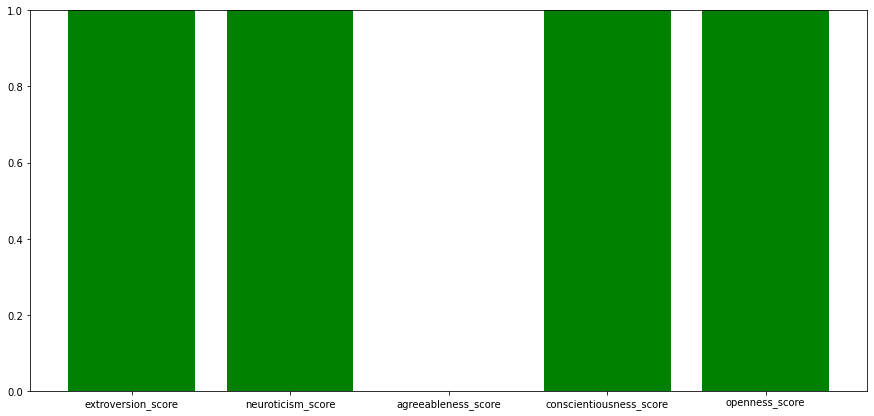

In [50]:
plt.figure(figsize=(15,7))
plt.ylim(0,1)
plt.bar(list(normalized_all_types_scores['one'].keys()), normalized_all_types_scores['one'].values(), color='g')
plt.show()

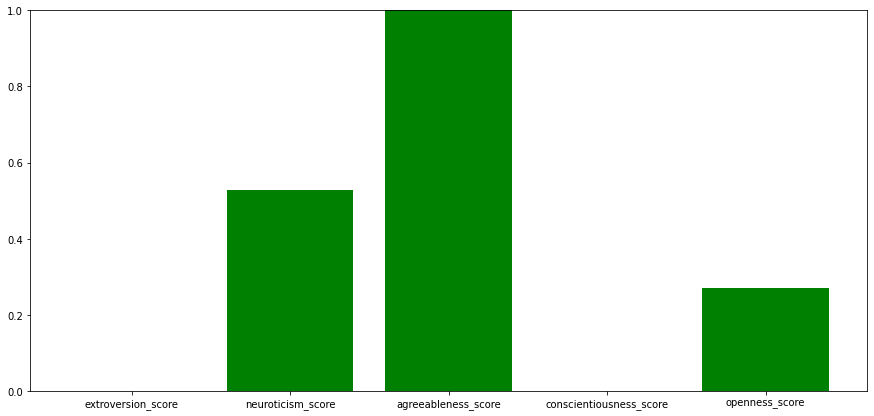

In [51]:
plt.figure(figsize=(15,7))
plt.ylim(0,1)
plt.bar(list(normalized_all_types_scores['two'].keys()), normalized_all_types_scores['two'].values(), color='g')
plt.show()

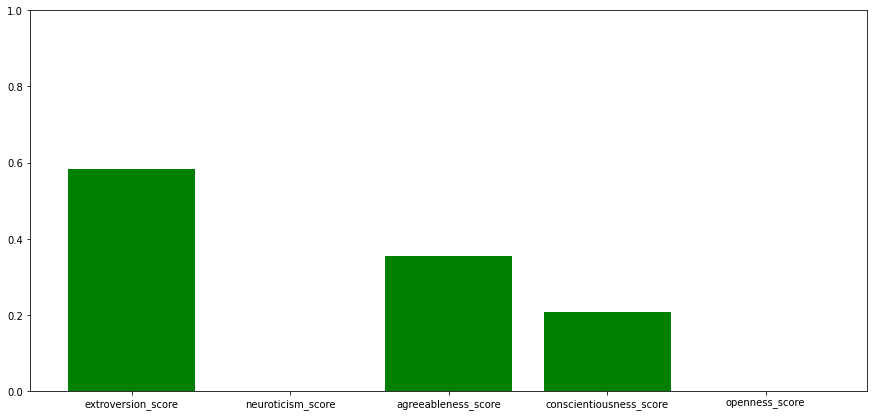

In [52]:
plt.figure(figsize=(15,7))
plt.ylim(0,1)
plt.bar(list(normalized_all_types_scores['three'].keys()), normalized_all_types_scores['three'].values(), color='g')
plt.show()

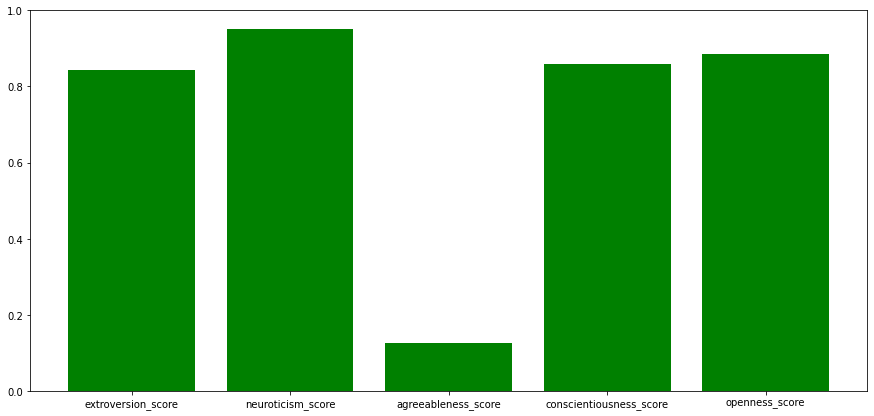

In [53]:
plt.figure(figsize=(15,7))
plt.ylim(0,1)
plt.bar(list(normalized_all_types_scores['four'].keys()), normalized_all_types_scores['four'].values(), color='g')
plt.show()

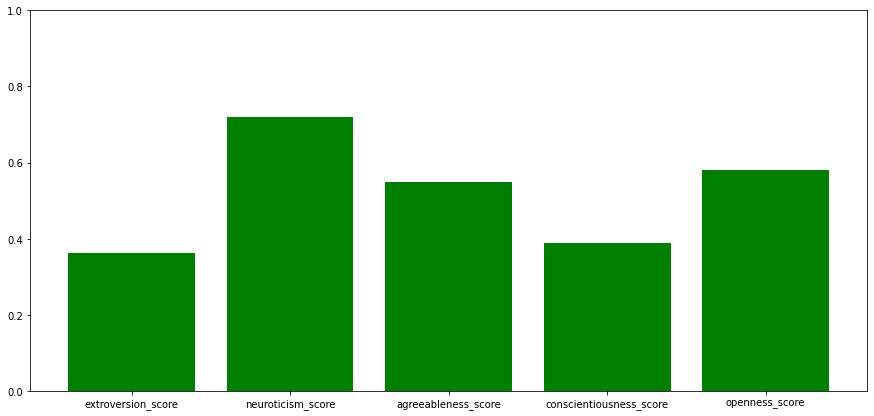

In [54]:
plt.figure(figsize=(15,7))
plt.ylim(0,1)
plt.bar(list(normalized_all_types_scores['five'].keys()), normalized_all_types_scores['five'].values(), color='g')
plt.show()

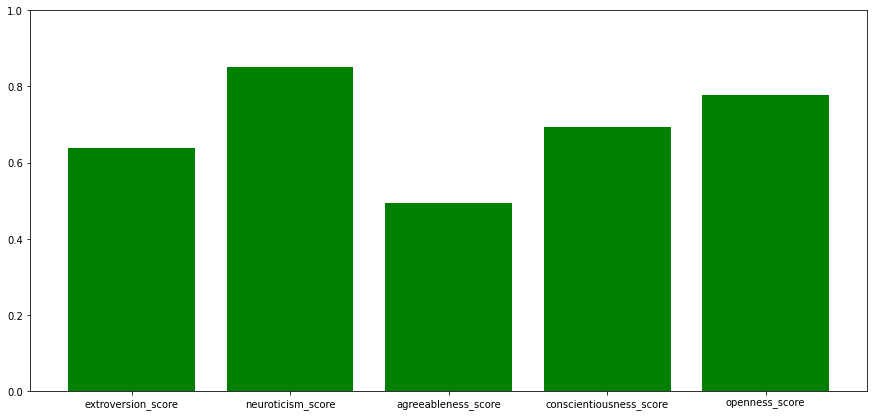

In [55]:
plt.figure(figsize=(15,7))
plt.ylim(0,1)
plt.bar(list(normalized_all_types_scores['six'].keys()), normalized_all_types_scores['six'].values(), color='g')
plt.show()

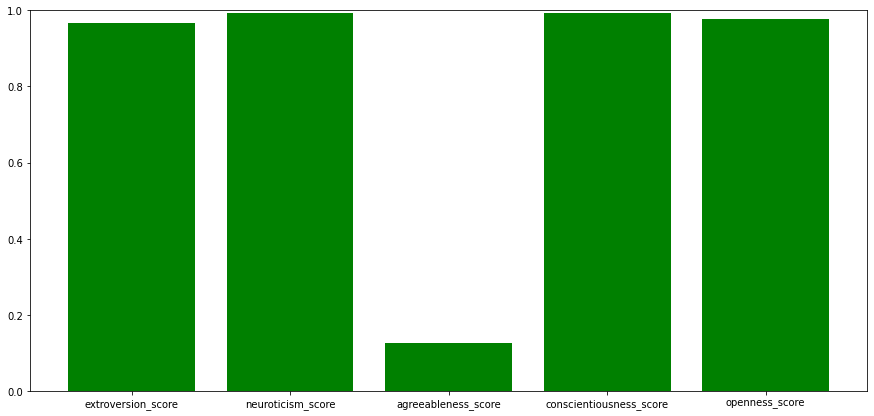

In [56]:
plt.figure(figsize=(15,7))
plt.ylim(0,1)
plt.bar(list(normalized_all_types_scores['seven'].keys()), normalized_all_types_scores['seven'].values(), color='g')
plt.show()

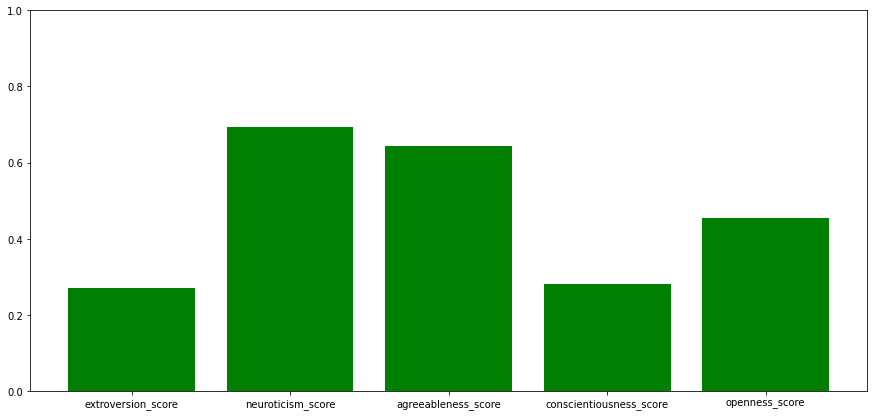

In [57]:
plt.figure(figsize=(15,7))
plt.ylim(0,1)
plt.bar(list(normalized_all_types_scores['eight'].keys()), normalized_all_types_scores['eight'].values(), color='g')
plt.show()

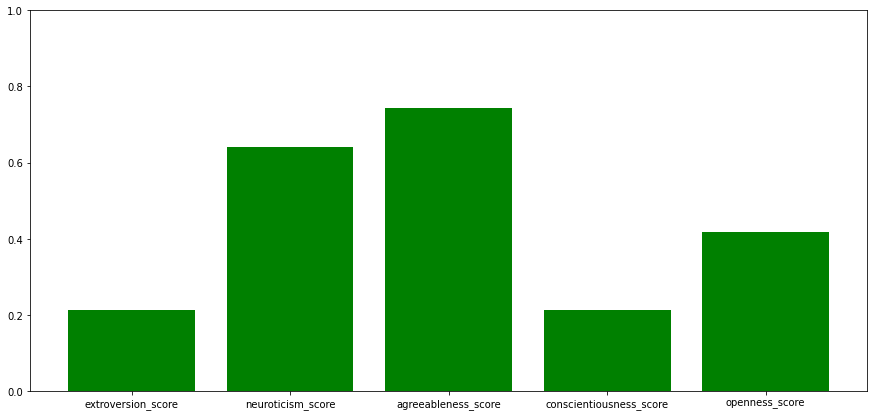

In [58]:
plt.figure(figsize=(15,7))
plt.ylim(0,1)
plt.bar(list(normalized_all_types_scores['nine'].keys()), normalized_all_types_scores['nine'].values(), color='g')
plt.show()

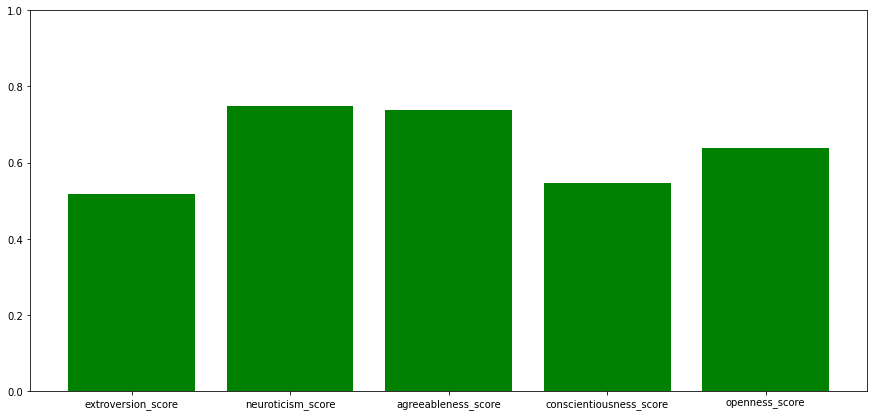

In [59]:
plt.figure(figsize=(15,7))
plt.ylim(0,1)
plt.bar(list(normalized_all_types_scores['ten'].keys()), normalized_all_types_scores['ten'].values(), color='g')
plt.show()